In [1]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-bxnh3ow5
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-bxnh3ow5
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
from pycaret.datasets import get_data
# Do multiclass classification on Iris dataset
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Set up model
from pycaret.classification import *
clf1 = setup(data, target = 'species', session_id=123, log_experiment=False, experiment_name='iris1')

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [10]:
best = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9714,0.0000,0.9714,0.9750,0.9713,0.9571,0.9590,0.0460
qda,Quadratic Discriminant Analysis,0.9714,0.0000,0.9714,0.9750,0.9713,0.9571,0.9590,0.0480
lda,Linear Discriminant Analysis,0.9714,0.0000,0.9714,0.9750,0.9713,0.9571,0.9590,0.0280
knn,K Neighbors Classifier,0.9619,0.9850,0.9619,0.9667,0.9617,0.9429,0.9454,0.0480
et,Extra Trees Classifier,0.9619,0.9959,0.9619,0.9667,0.9617,0.9429,0.9454,0.1620
lightgbm,Light Gradient Boosting Machine,0.9524,0.9912,0.9524,0.9560,0.9522,0.9286,0.9305,0.1060
nb,Naive Bayes,0.9429,0.9959,0.9429,0.9452,0.9428,0.9143,0.9156,0.0300
rf,Random Forest Classifier,0.9429,0.9959,0.9429,0.9495,0.9424,0.9143,0.9179,0.1980
xgboost,Extreme Gradient Boosting,0.9429,0.9810,0.9429,0.9476,0.9427,0.9143,0.9168,0.0560
dt,Decision Tree Classifier,0.9333,0.9500,0.9333,0.9407,0.9327,0.9000,0.9042,0.0580


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [11]:
evaluate_model(best)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

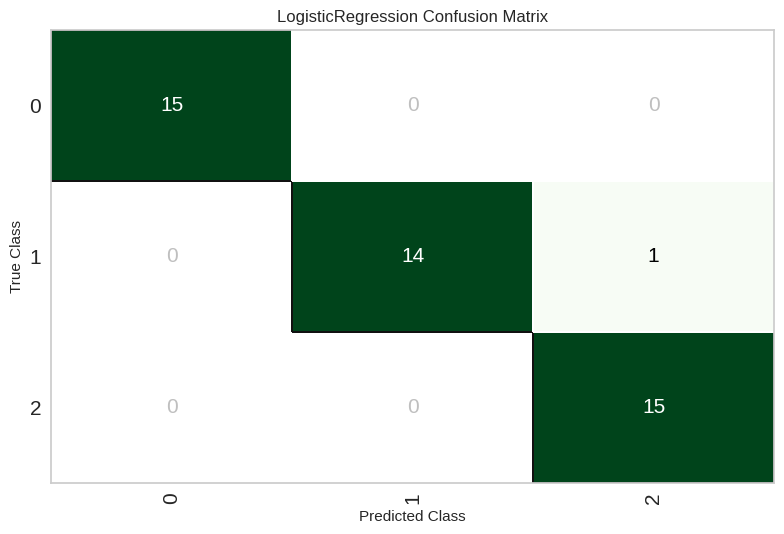

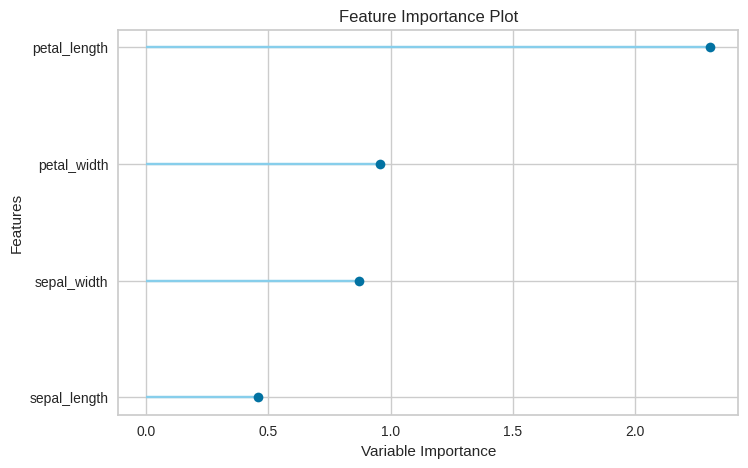

In [12]:
plot_model(best, plot='confusion_matrix')
plot_model(best, plot='feature')

In [13]:
#Finalize
tuned = tune_model(best)
final = finalize_model(tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
preds = predict_model(final)
preds.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9778,1.0000,0.9778,0.9792,0.9778,0.9667,0.9674


,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
72,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-versicolor,0.5960
125,7.2,3.2,6.0,1.8,Iris-virginica,Iris-virginica,0.9485
80,5.5,2.4,3.8,1.1,Iris-versicolor,Iris-versicolor,0.9572
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor,0.8053
117,7.7,3.8,6.7,2.2,Iris-virginica,Iris-virginica,0.9964


In [15]:
save_model(final, 'multiclass_iris')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                         